XGBoost is one of emsemble methods which connects several machine learning models. 

We call those each models as base learner

### 1, Basic Steps

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_census = pd.read_csv("Census_cleaned")

In [3]:
df_census

,Unnamed: 0,Age,fnlwgt,education-nun,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,0,39,77516,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,38,215646,9,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,53,234721,7,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,28,338409,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,37,284582,14,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,32555,27,257302,12,0,0,38,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32556,32556,40,154374,9,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32557,32557,58,151910,9,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32558,32558,22,201490,9,0,0,20,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df_census = df_census.drop(df_census.columns[0], axis=1)

In [5]:
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [8]:
clf = DecisionTreeClassifier(random_state=2)

In [9]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [10]:
y_pred = clf.predict(X_test) 

In [11]:
accuracy_score(y_pred, y_test)

0.8244471744471744

In [12]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [13]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income_ >50K, Length: 32560, dtype: int64

In [14]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_17 <= 0.50
|   |--- feature_3 <= 7073.50
|   |   |--- feature_2 <= 13.50
|   |   |   |--- feature_5 <= 44.50
|   |   |   |   |--- feature_4 <= 2218.50
|   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |--- feature_0 <= 38.50
|   |   |   |   |   |   |   |--- feature_0 <= 28.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 23874.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 23335.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  23335.50
|   |   |   |   |   |   |   |   |   |   |--- feature_49 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_49 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  23874.00
|   |   |   |   |   |   |   |   |   |--- feature_33 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_63 <= 0.50
|   |   |   |   |   |   | 

In [15]:
features = []
for i in df_census.columns:
    features.append(i)
target = features[-1]
features= features[0:-1]

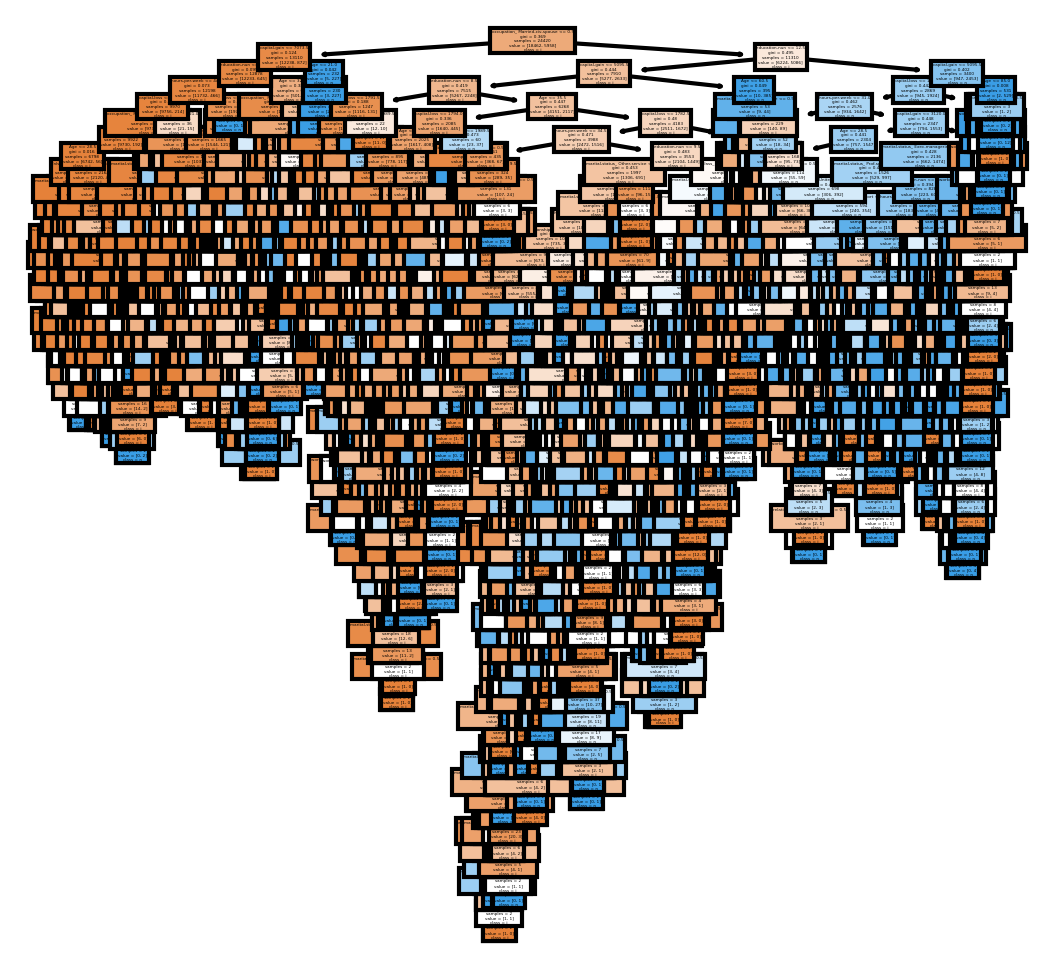

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = features, 
               class_names=target,
               filled = True);
fig.savefig('imagename.png')

## HyperParameter

In [18]:
df_bikes = pd.read_csv("cleaned data")

In [19]:
df_bikes

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,1,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,654
1,2,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,670
2,3,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1229
3,4,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1454
4,5,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1.0,1.0,12,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,1867
727,728,1.0,1.0,12,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,2451
728,729,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,1182
729,730,1.0,1.0,12,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,1432


In [20]:
X = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [24]:
reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(reg, X, y, scoring = 'neg_mean_squared_error', cv=5)

In [25]:
rmse = np.sqrt(-scores)
print("RMSE Average: %0.2f" % (rmse.mean()))

RMSE Average: 995.54


#### Average RMSE for Decision Tree is worse than the one from linear regression and XGBoost

#### Max_depth defines depth of tree, default is infinite. however it causes overfitting, so we may try max_depth params by trying. 
#### In this case, GridSearchCV tools are very helpful

In [29]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[None,2,3,4,6,8,10,20]}

In [35]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
reg = DecisionTreeRegressor(random_state=42)
grid_reg = GridSearchCV(reg,params,scoring='neg_mean_squared_error',
                       cv=5, return_train_score=True, n_jobs=-1)
grid_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 6, 8, 10, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
best_params = grid_reg.best_params_
print("Best Variable:", best_params)


Best Variable: {'max_depth': None}


In [42]:
#note: since the score is based on neg_mean_squared_erros the smallest is best params. so we need to add - sign

best_score = np.sqrt(-grid_reg.best_score_)
print("Train Score: {:.3f}".format(best_score))

Train Score: 741.386


### min_samples_leaf

In [50]:
from sklearn.metrics import mean_squared_error

def grid_search(params, reg=DecisionTreeRegressor(random_state=42)):
    grid_reg = GridSearchCV(reg,params, scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
    grid_reg.fit(X_train, y_train)
    best_params = grid_reg.best_params_
    print("Best Parameter: ", best_params)
    best_score=np.sqrt(-grid_reg.best_score_)
    print("Train Score: {:.3f}".format(best_score))
    y_pred = grid_reg.predict(X_test)
    rmse_test= mean_squared_error(y_test, y_pred)**0.5
    print('Test Score: {:.3f}'.format(rmse_test))

In [44]:
X_train.shape

(548, 12)

In [51]:
grid_search(params={'min_samples_leaf': [1,2,4,6,8,10,20,30]})

Best Parameter:  {'min_samples_leaf': 4}
Train Score: 698.696
Test Score: 636.683


In [52]:
#Test score is lower than train score. we can interpret this as less distribution

In [54]:
grid_search(params={'min_samples_leaf': [1,2,4,6,8,10,20,30], 'max_depth': ['None',2,3,4,6,8,10,20]})

Best Parameter:  {'max_depth': 10, 'min_samples_leaf': 4}
Train Score: 696.457
Test Score: 636.422
